## Data integration from Google Cloud

In [1]:
import pandas as pd

metadatapath = 'gs://rxrx1-us-central1/metadata/train.csv'
metadatadf = pd.read_csv(metadatapath)
metadatadf.head()

,id_code,experiment,plate,well,sirna
0,HEPG2-01_1_B03,HEPG2-01,1,B03,513
1,HEPG2-01_1_B04,HEPG2-01,1,B04,840
2,HEPG2-01_1_B05,HEPG2-01,1,B05,1020
3,HEPG2-01_1_B06,HEPG2-01,1,B06,254
4,HEPG2-01_1_B07,HEPG2-01,1,B07,144


In [13]:
len(metadatadf.sirna.unique())

1108

In [14]:
metadatadf.shape

(36515, 5)

In [2]:
import gcsfs
fs = gcsfs.GCSFileSystem(bucket_name="rxrx1-us-central1")
train_dir = fs.ls('rxrx1-us-central1/images/train/')
test_dir = fs.ls('rxrx1-us-central1/images/test/')

In [4]:
%%time
train_image_table = {'Id':[],'experiment':[],'plate':[],'well':[],'image':[],'site':[],'channel':[]}

#urlstem = 'https://storage.cloud.google.com/'
for experiment in train_dir:
    for plate in fs.ls(experiment):
        for image in fs.ls(plate):
            temp = image.split('/')
            #['rxrx1-us-central1', 'images', 'train', 'HEPG2-01', 'Plate1', 'B02_s1_w1.png']
            train_image_table['experiment'].append(temp[3])
            train_image_table['plate'].append(temp[4])
            well = temp[-1].split('_')
            train_image_table['well'].append(well[0])
            train_image_table['site'].append(well[1])
            train_image_table['channel'].append(well[2])
            train_image_table['Id'].append('_'.join([temp[3],temp[4],well[0]]))
            train_image_table['image'].append(image)

CPU times: user 4.68 s, sys: 655 ms, total: 5.33 s
Wall time: 31.2 s


In [5]:
train_df = pd.DataFrame(train_image_table)
train_df.shape

(487344, 7)

In [32]:
train_df.to_csv('train_tabel.csv')

In [7]:
%%time
test_image_table = {'Id':[],'experiment':[],'plate':[],'well':[],'image':[],'site':[],'channel':[]}
for experiment in test_dir:
    for plate in fs.ls(experiment):
        for image in fs.ls(plate):
            temp = image.split('/')
            test_image_table['experiment'].append(temp[3])
            test_image_table['plate'].append(temp[4])
            well = temp[-1].split('_')
            test_image_table['well'].append(well[0])
            test_image_table['site'].append(well[1])
            test_image_table['channel'].append(well[2])
            test_image_table['Id'].append('_'.join([temp[3],temp[4],well[0]]))
            test_image_table['image'].append(image)

CPU times: user 10.7 s, sys: 1.93 s, total: 12.6 s
Wall time: 1min 20s


In [8]:
test_df = pd.DataFrame(test_image_table)
test_df.shape

(265716, 7)

In [31]:
test_df.to_csv('test_tabel.csv')

In [10]:
test_df.tail()

,Id,experiment,plate,well,image,site,channel
265711,U2OS-05_Plate4_O23,U2OS-05,Plate4,O23,rxrx1-us-central1/images/test/U2OS-05/Plate4/O...,s2,w2.png
265712,U2OS-05_Plate4_O23,U2OS-05,Plate4,O23,rxrx1-us-central1/images/test/U2OS-05/Plate4/O...,s2,w3.png
265713,U2OS-05_Plate4_O23,U2OS-05,Plate4,O23,rxrx1-us-central1/images/test/U2OS-05/Plate4/O...,s2,w4.png
265714,U2OS-05_Plate4_O23,U2OS-05,Plate4,O23,rxrx1-us-central1/images/test/U2OS-05/Plate4/O...,s2,w5.png
265715,U2OS-05_Plate4_O23,U2OS-05,Plate4,O23,rxrx1-us-central1/images/test/U2OS-05/Plate4/O...,s2,w6.png


In [11]:
train_df.head()

,Id,experiment,plate,well,image,site,channel
0,HEPG2-01_Plate1_B02,HEPG2-01,Plate1,B02,rxrx1-us-central1/images/train/HEPG2-01/Plate1...,s1,w1.png
1,HEPG2-01_Plate1_B02,HEPG2-01,Plate1,B02,rxrx1-us-central1/images/train/HEPG2-01/Plate1...,s1,w2.png
2,HEPG2-01_Plate1_B02,HEPG2-01,Plate1,B02,rxrx1-us-central1/images/train/HEPG2-01/Plate1...,s1,w3.png
3,HEPG2-01_Plate1_B02,HEPG2-01,Plate1,B02,rxrx1-us-central1/images/train/HEPG2-01/Plate1...,s1,w4.png
4,HEPG2-01_Plate1_B02,HEPG2-01,Plate1,B02,rxrx1-us-central1/images/train/HEPG2-01/Plate1...,s1,w5.png


In [27]:
train_df.Id = train_df.Id.apply(lambda x: x.replace('Plate',''))
test_df.Id = test_df.Id.apply(lambda x: x.replace('Plate',''))
train_df.head()

,Id,experiment,plate,well,image,site,channel
0,HEPG2-01_1_B02,HEPG2-01,Plate1,B02,rxrx1-us-central1/images/train/HEPG2-01/Plate1...,s1,w1.png
1,HEPG2-01_1_B02,HEPG2-01,Plate1,B02,rxrx1-us-central1/images/train/HEPG2-01/Plate1...,s1,w2.png
2,HEPG2-01_1_B02,HEPG2-01,Plate1,B02,rxrx1-us-central1/images/train/HEPG2-01/Plate1...,s1,w3.png
3,HEPG2-01_1_B02,HEPG2-01,Plate1,B02,rxrx1-us-central1/images/train/HEPG2-01/Plate1...,s1,w4.png
4,HEPG2-01_1_B02,HEPG2-01,Plate1,B02,rxrx1-us-central1/images/train/HEPG2-01/Plate1...,s1,w5.png


In [29]:
loc = train_df.iloc[20].Id
loc

'HEPG2-01_1_B03'

In [30]:
metadatadf.loc[metadatadf['id_code'] == loc]

,id_code,experiment,plate,well,sirna
0,HEPG2-01_1_B03,HEPG2-01,1,B03,513


## Reading image

In [33]:
import matplotlib.pyplot as plt

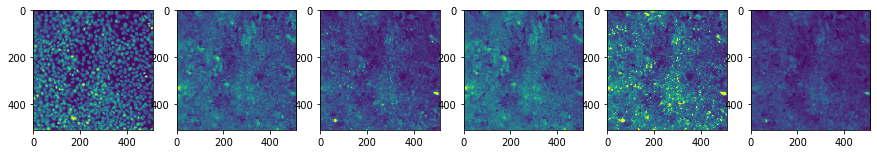

In [34]:
fig,ax = plt.subplots(1,6,figsize=(15,5))
for i in range(6):
    imagepath = train_df.image.iloc[i]
    image = plt.imread(fs.open(imagepath,'rb'))
    ax[i].imshow(image)

In [36]:
metadatadf.sirna.min(),metadatadf.sirna.max()

(0, 1107)